[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geo-di-lab/emerge-lessons/blob/main/docs/ch4/lesson5.ipynb)

# County-Level Analysis
Analyze GLOBE and environmental data for your county in Florida.

Write the name of your county in the quotes below. For example, `county = "Broward County"` or `county = "Miami-Dade County"`
For the rest of this code notebook, we will be looking at Broward County.

In [ ]:
county_name = "Your County Name"

# For example:
# county_name = "Broward County"

In [2]:
import geopandas as gpd
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sns

First, load 1) the GLOBE Mosquito Habitat Mapper data, and 2) a file with the Florida county boundaries from the [U.S. Census](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html), which will be used to filter the data to each county.

In [3]:
data = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/globe_mosquito.zip')
fl = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/florida_counties.geojson')

Then, get the geographic boundaries of your county.

In [4]:
county = fl.loc[fl['NAMELSAD'] == county_name]

Now, we use those boundaries to filter for all GLOBE Mosquito Habitat Mapper points within your county, from 2018 to 2024.

In [5]:
data_county = data.sjoin(county, how="inner", predicate="within")

num_total = len(data_county)

print(f"There were {num_total} GLOBE Mosquito Habitat Mapper points recorded within {county_name} from 2018 to 2024 by community scientists.")

num_eliminated = len(data_county[data_county['BreedingGroundEliminated'] == 'true'])
print(f"Of those points, {num_eliminated} ({round(num_eliminated * 100 / num_total)}%) mosquito habitats were successfully mitigated by the community scientists, which reduces the risk for mosquitoes at that location in the future.")

There were 43 GLOBE Mosquito Habitat Mapper points recorded within Broward County from 2018 to 2024 by community scientists.
Of those points, 26 (60%) mosquito habitats were successfully mitigated by the community scientists, which reduces the risk for mosquitoes at that location in the future.


In [6]:
data_county.head()

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,LarvaFullBodyPhotoUrls,LarvaeCount,LastIdentifyStage,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MosquitoAdults,MosquitoEggs,MosquitoHabitatMapperId,MosquitoPupae,Species,Userid,WaterSource,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,LarvaeCountProcessed,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER
6643,USA,United States,-0.4,None,true,When I went kayaking I saw sum in like the tre...,GLOBE Observer App,LarvaeVisibleNo,None,[WileyCollegeBIOL1422],None,0,None,5,automatic,2023-03-30 02:01:00,0,26.1638,-80.1253,None,None,42851,false,None,103027879,"puddle or still water next to a creek, stream ...",https://data.globe.gov/system/photos/2023/03/3...,flowing: still water found next to river or st...,17043304,United States of America Citizen Science,mosquito_habitat_mapper,314904,17RNJ874941,2023-03-30,0.0,POINT (-80.12548 26.16364),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
28674,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,0,identify,None,None,2019-08-24 11:27:00,0,26.3255,-80.1897,false,false,15439,false,None,57838002,"puddle, vehhicle or animal tracks",https://data.globe.gov/system/photos/2019/08/2...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-24,0.0,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29024,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-14 19:06:00,0,26.3255,-80.1897,None,None,15169,false,None,57838002,"puddle, vehhicle or animal tracks",https://data.globe.gov/system/photos/2019/08/1...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-14,NaN,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29395,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-04 16:29:00,0,26.3257,-80.1900,None,None,14785,false,None,57838002,adult mosquito trap,https://data.globe.gov/system/photos/2019/08/0...,container: artificial,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160293,17RNK808120,2019-08-04,NaN,POINT (-80.1904 26.32564),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29409,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-04 16:28:00,0,26.3254,-80.1899,None,None,14783,false,None,57838002,adult mosquito trap,https://data.globe.gov/system/photos/2019/08/0...,container: artificial,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-04,NaN,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277


How many mosquito observations have been submitted to GLOBE Observer each year? We'll make a bar plot to figure this out.

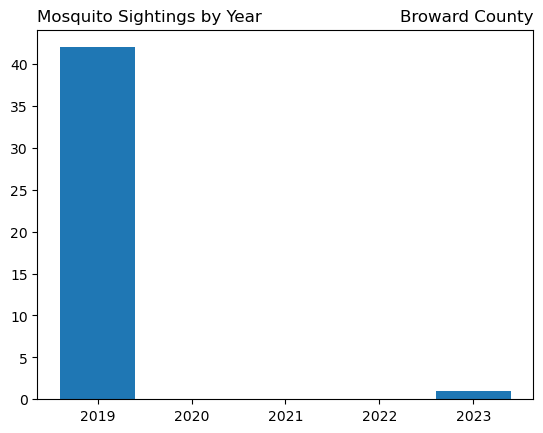

In [7]:
# Add a new column for year
data_county['MeasuredYear'] = data_county['MeasuredAt'].dt.year

# Make histogram of mosquito sightings each year
years = data_county[['SiteId', 'MeasuredYear']].groupby('MeasuredYear', as_index=False).count()
plt.bar(years['MeasuredYear'], years['SiteId'])
plt.title("Mosquito Sightings by Year", loc = 'left')
plt.title(county_name, loc = 'right')
plt.show()

Let's make a pie chart of the water source types (both general and specific) where mosquitoes were reported in this county.

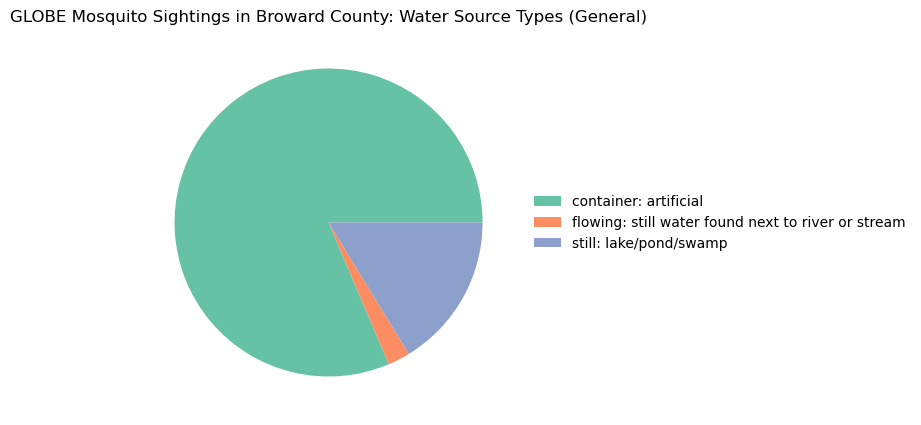

In [8]:
types = data_county[['SiteId', 'WaterSourceType']].groupby('WaterSourceType', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))
plt.title(f"GLOBE Mosquito Sightings in {county_name}: Water Source Types (General)")
plt.legend(patches, types['WaterSourceType'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

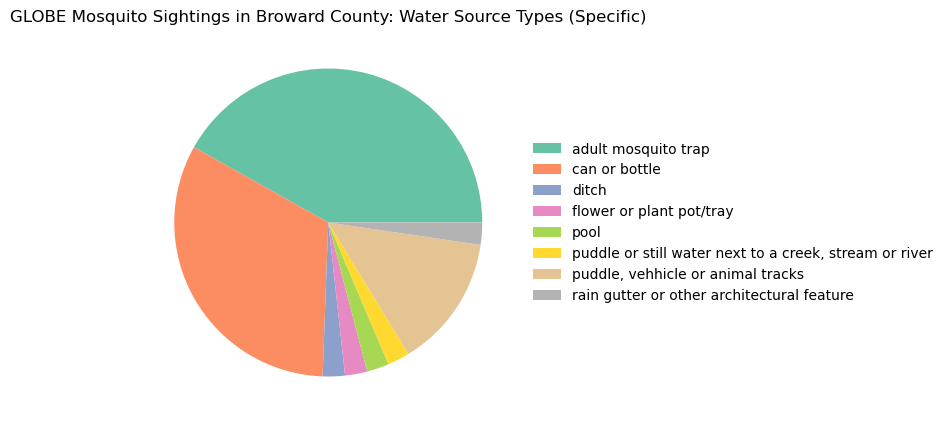

In [9]:
types = data_county[['SiteId', 'WaterSource']].groupby('WaterSource', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))
plt.title(f"GLOBE Mosquito Sightings in {county_name}: Water Source Types (Specific)")
plt.legend(patches, types['WaterSource'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## Temperature and Land Use

The following code sets everything up needed for our analysis using Google Earth Engine.

In [10]:
from datetime import datetime
import numpy as np
from pylab import *
import folium
import ee
import geemap
import geopandas as gpd
ee.Authenticate()

# Write your project ID here, in quotes
ee.Initialize(project = "emerge-lessons")

def add_ee_layer(self, ee_image_object, vis_params, name):
    """Adds a method for displaying Earth Engine image tiles to folium map."""
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_7TDKVSyKvBdmMqW?ref=4i2o6


In [11]:
# Convert county boundaries to Earth Engine format
region = geemap.geopandas_to_ee(county)

# Zoom to the county
county_center = county.iloc[0].geometry.centroid

map = folium.Map([county_center.y, county_center.x], tiles="Cartodb dark_matter", zoom_start=10)

Map land surface temperature across the county.

First, define a date range. We will find the average temperature within this range. For this example, we will use June 2025. The start date is inclusive (meaning we'll get data including that date) and the end date is exclusive (meaning we'll get all dates leading up to, but not including, the end date).

In [12]:
start_date = "2025-06-01"
end_date = "2025-07-01"

The data comes from Google Earth Engine: [MOD11A1.061 Terra Land Surface Temperature and Emissivity Daily Global 1km](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD11A1). The land surface temperature data are scaled, so to get the original temperature in Kelvin, the value needs to be multipled by 0.02. Then, this can be converted into degrees Celsius and Fahrenheit.

In [13]:
def to_fahrenheit(lst):
  celsius = lst * 0.02 - 273.15
  fahrenheit = celsius * 1.8 + 32
  return fahrenheit

def to_lst(fahrenheit):
  celsius = (fahrenheit - 32) / 1.8
  lst = (celsius + 273.15) / 0.02
  return lst

In [14]:
lst = (
    ee.ImageCollection('MODIS/061/MOD11A1')
      .filterDate(start_date, end_date)
      .select('LST_Day_1km')
      .mean()   # Can also use median() here to get the median instead of the average
      .clip(region)
)

colors = [
    '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
    '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
    '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
    'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
    'ff0000', 'de0101', 'c21301', 'a71001', '911003'
]

lst_vis = {
    'min': 14157.5, # 50 *F
    'max': 15546.4, # 100 *F
    'palette': colors,
}

map.add_ee_layer(lst, lst_vis, "LST")

display(map)

Below is a colorbar that shows what the colors on the map represents: land surface temperature in degrees Fahrenheit.

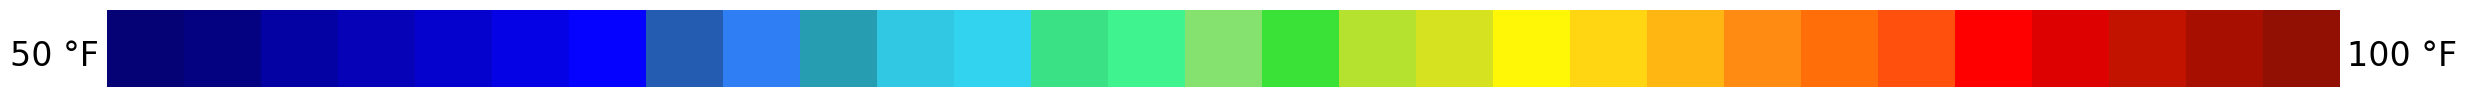

In [15]:
plt.figure(figsize=(len(colors), 1))
plt.imshow([ [to_rgb(f'#{c}') for c in colors] ])

plt.text(-0.6, 0.1, '50 °F', va='center', ha='right', fontsize=24)
plt.text(len(colors) - 0.4, 0.1, '100 °F', va='center', ha='left', fontsize=24)

plt.axis('off')
plt.show()

Next, find the average temperature across the county.

In [16]:
mean_lst = lst.reduceRegion(reducer=ee.Reducer.mean(), geometry=region, scale=1000,
                              maxPixels=1e12).get('LST_Day_1km').getInfo()

print(f"The average temperature for {county_name} from {start_date} to {end_date} is {round(to_fahrenheit(mean_lst), 2)}°F")

The average temperature for Broward County from 2025-06-01 to 2025-07-01 is 87.67°F


See the land use and land cover in the county.

In [17]:
## Land Use

# Reset the map
map = folium.Map([county_center.y, county_center.x], tiles="Cartodb dark_matter", zoom_start=10)

# Define land cover color palette
palette = ['fbff97', 'e6558b', '004e2b', '9dbac5', 'a6976a', '1b1716']
visual = {'min': 1, 'max': 6, 'palette': palette}

landcover_1985 = (
    ee.ImageCollection('USFS/GTAC/LCMS/v2024-10')
      .filterDate('1985', '1986')
      .filter('study_area == "CONUS"')
      .first()
      .clip(region)
)

map.add_ee_layer(landcover_1985.select('Land_Use'), visual, '1985 Land Use')

landcover_2024 = (
    ee.ImageCollection('USFS/GTAC/LCMS/v2024-10')
      .filterDate('2024', '2025')
      .filter('study_area == "CONUS"')
      .first()
      .clip(region)
)

map.add_ee_layer(landcover_2024.select('Land_Use'), visual, '2024 Land Use')

folium.LayerControl(collapsed = False).add_to(map)
display(map)

$$\color{#fbff97}Agriculture$$
$$\color{#e6558b}Developed$$
$$\color{#004e2b}Forest$$
$$\color{#9dbac5}Other$$
$$\color{#a6976a}Rangeland or Pasture$$

We will create a function that calculates the percent of each type of land use and land cover in the county.

In [18]:
def land_stats(image, name, labels):
  count = image.select(name).reduceRegion(ee.Reducer.frequencyHistogram(), geometry=region, scale=30, maxPixels=1e12).getInfo()

  land_cover_counts = {}

  for key, value in labels.items():
      if key in count[name]:
          land_cover_counts[value] = count[name][key]

  total_pixels = sum([land_cover_counts[i] for i in land_cover_counts])

  for label, num in land_cover_counts.items():
    percent = round(100 * num / total_pixels, 1)
    if percent > 0:
      print(f"{label}: {percent}%")

In [19]:
land_use_labels = {'1': 'Agriculture',
                   '2': 'Developed',
                   '3': 'Forest',
                   '4': 'Other',
                   '5': 'Rangeland or Pasture',
                   '6': 'Non-Processing Area Mask'}

land_stats(landcover_1985, 'Land_Use', land_use_labels)

Agriculture: 4.5%
Developed: 19.6%
Forest: 8.5%
Other: 9.6%
Rangeland or Pasture: 55.8%
Non-Processing Area Mask: 2.0%


Now, we repeat for 2024.

In [20]:
land_stats(landcover_2024, 'Land_Use', land_use_labels)

Agriculture: 0.6%
Developed: 29.4%
Forest: 11.6%
Other: 15.2%
Rangeland or Pasture: 43.1%


In [21]:
## Land Cover

# Reset the map
map = folium.Map([county_center.y, county_center.x], tiles="Cartodb dark_matter", zoom_start=10)

palette = ['004e2b', '009344', '61bb46', 'acbb67', '8b8560', 'cafd4b', 'f89a1c', '8fa55f', 'bebb8e', 'e5e98a', 'ddb925', '893f54', 'e4f5fd', '00b6f0', '1b1716']
visual = {'min': 1, 'max': 15, 'palette': palette}

# Add land cover for 1985 and 2024
map.add_ee_layer(landcover_1985.select('Land_Cover'), visual, '1985 Land Cover')
map.add_ee_layer(landcover_2024.select('Land_Cover'), visual, '2024 Land Cover')

folium.LayerControl(collapsed = False).add_to(map)
display(map)

$$\color{#004e2b}Trees$$
$$\color{#61bb46}Shrubs \space and \space Trees Mix$$
$$\color{#acbb67}Grass/Forb/Herb \space and \space Trees Mix$$
$$\color{#8b8560}Barren \space and \space Trees Mix$$
$$\color{#f89a1c}Shrubs$$
$$\color{#8fa55f}Grass/Forb/Herb \space and \space Shrubs Mix$$
$$\color{#bebb8e}Barren \space and \space Shrubs Mix$$
$$\color{#e5e98a}Grass/Forb/Herb$$
$$\color{#ddb925}Barren \space and \space Grass/Forb/Herb Mix$$
$$\color{#893f54}Barren or Impervious$$
$$\color{#e4f5fd}Snow or Ice$$

Find the percent of each type of land cover.

In [22]:
land_cover_labels = {
    '1': 'Trees',
    '2': 'Tall Shrubs & Trees Mix (AK Only)',
    '3': 'Shrubs & Trees Mix',
    '4': 'Grass/Forb/Herb & Trees Mix',
    '5': 'Barren & Trees Mix',
    '6': 'Tall Shrubs (AK Only)',
    '7': 'Shrubs',
    '8': 'Grass/Forb/Herb & Shrubs Mix',
    '9': 'Barren & Shrubs Mix',
    '10': 'Grass/Forb/Herb',
    '11': 'Barren & Grass/Forb/Herb Mix',
    '12': 'Barren or Impervious',
    '13': 'Snow or Ice',
    '14': 'Water',
    '15': 'Non-Processing Area Mask'
}

In [23]:
land_stats(landcover_1985, 'Land_Cover', land_cover_labels)

Trees: 10.5%
Grass/Forb/Herb & Trees Mix: 1.2%
Grass/Forb/Herb & Shrubs Mix: 0.1%
Grass/Forb/Herb: 61.6%
Barren or Impervious: 16.6%
Water: 8.1%
Non-Processing Area Mask: 2.0%


In [24]:
land_stats(landcover_2024, 'Land_Cover', land_cover_labels)

Trees: 15.7%
Grass/Forb/Herb & Trees Mix: 1.2%
Grass/Forb/Herb & Shrubs Mix: 0.1%
Grass/Forb/Herb: 48.8%
Barren or Impervious: 19.9%
Water: 14.2%


Data:
- [MOD11A1.061 Terra Land Surface Temperature and Emissivity Daily Global 1km](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD11A1)
- [USFS Landscape Change Monitoring System v2024.10 (CONUS and OCONUS)](https://developers.google.com/earth-engine/datasets/catalog/USFS_GTAC_LCMS_v2024-10#bands)